In [1]:
import math
import itertools
import numpy as np
import matplotlib.pyplot as plt

#import plotly
#import plotly.express as px

from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import tqdm
#from functools import lru_cache
#import re
import networkx as nx
from networkx.algorithms import approximation

import MDAnalysis as mda

#import scipy
#import sklearn
#import skimage

#import xml.etree.ElementTree as et
#from Bio.PDB import *
#import nglview as nv

from timeit import default_timer as timer



# http://nglviewer.org/nglview/latest/api.html
# https://biopython.org/wiki/The_Biopython_Structural_Bioinformatics_FAQ
# https://ambermd.org/tutorials/analysis/tutorial_notebooks/nglview_notebook/index.html
# https://amber-md.github.io/pytraj/latest/_api/pytraj.html

In [2]:
#contact_matrix = np.loadtxt('/home/lillo/TesiCNTE/CNTE/dataset/contact_matrix.txt')   #laptop
#contact_matrix = np.loadtxt('/home/lillo/Code/Tesi/dataset/contact_matrix.txt')        #fisso
#contact_matrix_single = contact_matrix.reshape(100,100,12,12)

#gromacs_output = open('/home/lillo/Code/Tesi/dataset/dm4500Compl_mix1_K2_1%4500ns.gro') #fisso
#gromacs_output = open('/home/lillo/TesiCNTE/CNTE/dataset/dm4500Compl_mix1_K2_1%4500ns.gro') #laptop

#path = '/home/lillo/Code/Tesi/dataset/dm4500Compl_mix1_K2_1%4500ns.gro' #fisso
#path = '/home/lillo/TesiCNTE/CNTE/dataset/dm4500Compl_mix1_K2_1%4500ns.gro' #laptop

# import 2mxu file (beta sheet)

#path_to_mmCIF = open('/home/lillo/TesiCNTE/pdb/2mxu/2mxu.cif')  ## laptop
#path_to_pdb = '/home/lillo/TesiCNTE/pdb/2mxu/2mxu.pdb'  ## laptop
#pa_to_pdb = '/home/lillo/TesiCNTE/pdb/2mxu/2mxu.pdb'  ## laptop

#path_to_mmCIF = open('/home/lillo/Code/Tesi/pdb/2mxu/2mxu.cif')  ## fisso
#path_to_pdb = '/home/lillo/Code/Tesi/pdb/2mxu/2mxu.pdb'  ## fisso
#pa_to_pdb = '/home/lillo/Code/Tesi/pdb/2mxu/2mxu.pdb'  ## fisso

seed_1_path = '/home/lillo/TesiCNTE/from_cluster/aggregate1.gro' # laptop
#seed_1_path = '/home/lillo/Code/Tesi/dataset/aggregate1.gro' # Fisso

prod_gro = '/home/lillo/TesiCNTE/from_cluster/prod/prod_part1/min.gro'            # laptop
prod_xtc = '/home/lillo/TesiCNTE/from_cluster/prod/prod_part1/prod.xtc'           # laptop
prod1_xtc = '/home/lillo/TesiCNTE/from_cluster/prod/prod_part2/prod-compl.xtc'    # laptop

trj_xtc = '/home/lillo/TesiCNTE/CNTE/trajectory/prd-LDLK12-100mer-out-mol.xtc'  #laptop
trj_gro = '/home/lillo/TesiCNTE/CNTE/trajectory/min-LDLK12-100mer-out-c.gro'  #laptop

#trj_xtc = '/home/lillo/Code/Tesi/dataset/trajectory_6_12_19/prd-LDLK12-100mer-out-mol.xtc'  #fisso
#trj_gro = '/home/lillo/Code/Tesi/dataset/trajectory_6_12_19/min-LDLK12-100mer-out-c.gro'  #fisso
p73_2per_wat_seed_1_gro = '/home/lillo/TesiCNTE/from_cluster/peptide_73/MARTINI/2%/WATER/2%/seed_1/prod/73prod.gro'     # laptop
p73_2per_wat_seed_1_xtc = '/home/lillo/TesiCNTE/from_cluster/peptide_73/MARTINI/2%/WATER/2%/seed_1/prod/73prod.xtc'     # laptop
p73_2per_wat_seed_1_trr = '/home/lillo/TesiCNTE/from_cluster/peptide_73/MARTINI/2%/WATER/2%/seed_1/prod/73prod.trr'     # laptop

In [ ]:
trj.number_of_BB_atoms

In [3]:
import torch

In [4]:
torch.cuda.is_available()

True

In [5]:
import morphoscanner

In [ ]:
trj = morphoscanner.trajectory.trajectory(trj_gro, trj_xtc)

In [ ]:
trj.compose_database(peptide_length=12, interval=50)

In [ ]:
trj.analyze_inLoop()

In [ ]:
trj.get_data()

In [ ]:
trj.get_database()

In [ ]:
trj.database

In [ ]:
trj.frames.get(150).keys()

In [ ]:
morphoscanner.plot.plot.plot_peptide_list(trj.frames.get(150).get('frame_dict'), trj.frames.get(150).get('subgraphs_full')[0])

In [ ]:
%matplotlib notebook

In [ ]:
uni = morphoscanner.backend.topology.make_universe(trj_gro,trj_xtc)

In [ ]:
uni.

In [ ]:
# fareclasse frame, in cui ogni frame è un oggetto

In [ ]:
#def get_coordinate_dict_from_trajectory(trj_gro, trj_xtc, peptide_length=None, start_from=0, interval=1):
#    '''Parse coordinate from a .gro topology and a .xtc trajectory.
    
#    Arguments:  .gro topology file path,
            
#                .xtc trajectory file path,
                
                
#                optional:
                    
#                    peptide_length, default=None.   You can set the length of the peptide
#                                                    Useful if you have to analyze simulation in which
#                                                    there are premade aggregate
                                    
#                    start_from, default=0.    You can chose from which frame start the counter.
#                                                Useful if you are working with a simulation
#                                                made of different part. Eg. If part 1 end at
#                                                frame 500, you can set start_from=500 and analyze
#                                                part 2 of the simulation. Use it expecially
#                                                if you are sampling (interval != 1)
#                                                
#                    interval, default=1     Interval between sample. If you want all the frame,
#                                            interval=1 (default).
#                                            If you want to skip sample, this parameter let you
#                                            choose the interval between 2 sample frame.
    
    
#    '''
from morphoscanner.backend.topology import get_peptide_length_list
from morphoscanner.backend.topology import make_universe
import tqdm



peptide_length=12
start_from=0
interval=50

peptides_list = get_peptide_length_list(trj_gro)

universe = make_universe(trj_gro, trj_xtc)


if peptide_length == None:


    n_pep = len(peptides_list)


else:

    n_pep = sum([(e // peptide_length) for e in peptides_list])



trj_dict = {}

for index_ts, ts in tqdm.tqdm(enumerate(universe.trajectory)):

    updated_index = (index_ts + start_from)

    if (updated_index % interval) == 0:

        frm = frame(peptide_length, universe, peptides_list, n_pep)
        trj_dict[updated_index] = frm

In [ ]:
morphoscanner.plot.plot.plot_peptide_list(trj_dict.get(150), [i for i in trj_dict.get(0)])

In [ ]:
trj_dict[0].peptides[0].

In [ ]:
for index, atom in enumerate(universe.atoms):
    
    
    atom_type = str(atom).split()[2]

    if atom_type == 'BB':

        atom_number = (int(str(atom).split()[1].split(':')[0]) - 1)
        
        residue_name = (str(atom).split()[8].split(',')[0])

        coordinate = universe.atoms[atom_number].position

        #position = len(trj_dict[updated_index][peptide])
        
        
        
        
        
        print(residue_name)
        #print((str(atom).split()[8].split(',')[0]))



       # trj_dict[updated_index][peptide][position] = coordinate

In [ ]:
_gro = get_gro()
_xtc = get_xtc()

trj = trajectory(_gro, _xtc)

print('Your trajectory has %d frames' % trj.number_of_frames)
print('Your trajectory has %d BB atoms' % trj.number_of_BB_atoms)


peptide_length = peptide_length(sentence='Set the number of aminoacids in one peptide (int): ')
interval = get_interval(sentence='Set the interval between sampled frames (int): ')
start_from = start_from(sentence='Set the index from which you want to start.\n\n0 if you have a single simulation.\n0 if you are analyzing split1.\nlen(split1) if you are analyzing split2.\ninteger: ')

output_path, file_name = get_destination_dir_and_name()


trj.compose_database(peptide_length=peptide_length, interval=interval)
trj.analyze_inLoop()
trj.get_data()
trj.get_database()
    

In [ ]:
import torch

In [ ]:
zero = trj_dict.get(0).get(0)

In [ ]:
t = torch.stack([torch.from_numpy(zero[e]) for e in zero])

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.imshow(t)

In [ ]:
plt.close()

In [ ]:
morphoscanner.backend.distance_tensor.compute_euclidean_norm_torch()

In [ ]:
def compute_euclidean_norm(peptide1, peptide2):

    x_norm = torch.pow(peptide1, 2).sum(1).view(-1,1)
    y_t = torch.transpose(peptide2, 0, 1)
    y_norm = torch.pow(peptide2, 2).sum(1).view(1,-1)

    dist = torch.sqrt(x_norm + y_norm - 2.0 * torch.mm(peptide1, y_t))
    dist[torch.isnan(dist)] = 0

    return dist

In [ ]:
t_dist = compute_euclidean_norm(t, t)

In [ ]:
plt.imshow(t_dist)

In [ ]:
frame

In [ ]:
# working

class frame:
    
    '''Class that parse the trajectory and gives back frames with data.
    
    This class is used to represent data in an intuitive way to the user
    
    
    '''

    def __init__(self, peptide_length, universe, peptides_list, n_pep):
        
        # cosa vuoi aggiungere?
        
        # forse è meglio se si fa una classe frames dentro la classe trajectory
        # e poi si istanzia la classe frame ad ogni frame campionato
        # e dentro si mettono anche i risultati dell'analisi
        # 
        # prendo a riferimento i frames, quindi la traiettoria
        # oppure prendo a riferimento il tipo di peptide?
        # forse meglio il frame, e poi posso tracciare le famiglie di peptidi tra
        # i frames.
        # 
        # devo anche individuare quali sono le sequenze
        # e raggruppare i peptidi con sequenza uguale
        # 
        #

    
        self.peptides = {}

        for peptide in range(n_pep):

            self.peptides[peptide] = {}


            if peptide == 0:

                counter = 0

            else:
                
                # if to check peptide_length
                if peptide_length == None:

                    counter += peptides_list[peptide - 1]

                else:
                    counter += peptide_length
                

        

            pep = single_peptide(universe, counter, peptide, peptide_length, peptides_list)
            
            self.peptides[peptide] = pep
        
        return
    
    

In [ ]:
test = morphoscanner.trajectory.trajectory(trj_gro, trj_xtc)

In [ ]:
frame

In [ ]:
from morphoscanner import backend
from timeit import default_timer as timer
import pandas as pd

class trajectory:

    '''Class to operate on trajectory files.

    It makes an object that contain the trajectory of the simulation'''



    def __init__(self, trj_gro, trj_xtc):
        
        

        self.trj_gro = trj_gro
        self.trj_xtc = trj_xtc
        self.universe = backend.topology.make_universe(self.trj_gro, self.trj_xtc)
        self.number_of_frames = len(self.universe.trajectory)
        self.number_of_BB_atoms = len(self.universe.select_atoms('name BB'))
        self.frames = {}
        
        peptide_length_list = backend.topology.get_peptide_length_list(self.trj_gro)
        self.len_dict = backend.topology.get_peptide_length_dict(peptide_length_list)



    def compose_database(self, peptide_length=None, start_from=0, interval=1):

        self.peptide_length = peptide_length
        self.start_from = start_from
        self.interval = interval

        self.data = backend.topology.get_coordinate_dict_from_trajectory(self.trj_gro, self.trj_xtc, peptide_length=self.peptide_length, start_from=self.start_from, interval=self.interval)
        self.sampled_frames = [key for key in self.data.keys()]

In [ ]:
atom_list = morphoscanner.backend.readGro.clean_gro(trj_gro)

In [ ]:
atom_list

In [ ]:
atoms_list = morphoscanner.backend.readGro.clean_gro(trj_gro)
unique_peptide = {}

peptide_length_list = []
peptide_residue_list = []
temporary_list = []
temporary_residue_list = []

# iterate trough topology
for atom in atoms_list:

    # if temporary list just started, add aminoacid position in chain
    if len(temporary_list) == 0:
        temporary_list.append(int(atom[1]))
        temporary_residue_list.append(atom[2])

    else:
        # if position of actual residue is less than last residue
        if temporary_list[-1] > int(atom[1]):

            # append length of last peptide to peptide length list
            peptide_length_list.append(len(temporary_list))
            peptide_residue_list.append(temporary_residue_list)

            # empty temporary list
            temporary_list = []
            temporary_residue_list = []

            # append actual residue position
            temporary_list.append(int(atom[1]))

        # if position of actual residue is higher than last residue, ad current residue position
        else:
            temporary_list.append(int(atom[1]))
            temporary_residue_list.append(atom[2])


# append last peptide lenght to lenght stack
peptide_length_list.append(len(temporary_list))
peptide_residue_list.append(temporary_residue_list)


In [ ]:
peptide_residue_list

In [ ]:
# Work in new trajectory management
class single_peptide():
    
    ''' Class that define peptides
    
    '''
    
    def __init__(self, universe, counter, peptide, peptide_length, peptides_list):
        
        self.peptide_sequence = {}
        
        self.peptide_coordinates = {}
        
        
        if peptide_length == None:

            for res in range(peptides_list[peptide]):

                for index, atom in enumerate(universe.residues[res + (counter)].atoms):

                    atom_type = str(atom).split()[2]

                    if atom_type == 'BB':

                        atom_number = (int(str(atom).split()[1].split(':')[0]) - 1)

                        residue_name = (str(atom).split()[8].split(',')[0])

                        coordinate = universe.atoms[atom_number].position

                        position = len(self.peptide_coordinates)


                        self.peptide_coordinates[position] = coordinate
                        
                        self.peptide_sequence[position] = residue_name
                    
                    else:
                        pass


        else:

            for res in range(peptide_length):

                for index, atom in enumerate(universe.residues[res + (counter)].atoms):

                    atom_type = str(atom).split()[2]

                    if atom_type == 'BB':

                        atom_number = (int(str(atom).split()[1].split(':')[0]) - 1)

                        residue_name = (str(atom).split()[8].split(',')[0])

                        coordinate = universe.atoms[atom_number].position

                        position = len(self.peptide_coordinates)


                        self.peptide_coordinates[position] = coordinate
                        
                        self.peptide_sequence[position] = residue_name

                    else:
                        pass

        return

In [ ]:
class database:

    '''Class that parse the trajectory and gives back frames with data.

    This class is used to represent data in an intuitive way to the user


    '''


    def __init__(self, peptide_length=None, start_from = 0, interval = 1):

        # cosa vuoi aggiungere?

        # forse è meglio se si fa una classe frames dentro la classe trajectory
        # e poi si istanzia la classe frame ad ogni frame campionato
        # e dentro si mettono anche i risultati dell'analisi
        # 
        # prendo a riferimento i frames, quindi la traiettoria
        # oppure prendo a riferimento il tipo di peptide?
        # forse meglio il frame, e poi posso tracciare le famiglie di peptidi tra
        # i frames.
        # 
        # devo anche individuare quali sono le sequenze
        # e raggruppare i peptidi con sequenza uguale
        # 
        #

        self.frames = {}
        self.peptide_length = peptide_length
        self.start_from = start_from
        self.interval = interval

        peptides_list = backend.topology.get_peptide_length_list(trj_gro)

        universe = backend.topology.make_universe(trj_gro, trj_xtc)


        if peptide_length == None:


            n_pep = len(peptides_list)


        else:

            n_pep = sum([(e // peptide_length) for e in peptides_list])



        self.frames = {}

        for index_ts, ts in tqdm.tqdm(enumerate(universe.trajectory)):

            updated_index = (index_ts + start_from)

            if (updated_index % interval) == 0:

                peptides = {}

                for peptide in range(n_pep):

                    peptides[peptide] = {}


                    if peptide == 0:

                        counter = 0

                    else:

                        # if to check peptide_length
                        if peptide_length == None:

                            counter += peptides_list[peptide - 1]

                        else:
                            counter += peptide_length




                    pep = single_peptide(universe, counter, peptide, peptide_length, peptides_list)

                    peptides[peptide] = pep

                self.frames[updated_index] = peptides

        return

In [ ]:
from morphoscanner import backend

class trajectory:

    '''Class to operate on trajectory files.

    It makes an object that contain the trajectory of the simulation'''



    def __init__(self, trj_gro, trj_xtc):
        
        

        self.trj_gro = trj_gro
        self.trj_xtc = trj_xtc
        self.universe = backend.topology.make_universe(self.trj_gro, self.trj_xtc)
        self.number_of_frames = len(self.universe.trajectory)
        self.number_of_BB_atoms = len(self.universe.select_atoms('name BB'))
        #self.frames = {}
        
        peptide_length_list = backend.topology.get_peptide_length_list(self.trj_gro)
        self.len_dict = backend.topology.get_peptide_length_dict(peptide_length_list)
        
        return

    
    def compose_database(self, peptide_length=None, start_from=0, interval=1):

        self.peptide_length = peptide_length
        self.start_from = start_from
        self.interval = interval

        self.database = database(peptide_length, start_from, interval)

        
        



In [ ]:
trj_new = trajectory(trj_gro, trj_xtc)

In [ ]:
trj_new.compose_database(peptide_length=12, start_from=0, interval=50)

In [ ]:
trj_new.database.frames[0][55].peptide_coordinates

In [ ]:
cleaned

In [ ]:
#def get_peptide_length_list(topology):
topology = trj_gro
topology = clean_gro(topology)

peptide_length_list = []

temporary_list = []

# iterate trough topology
for residue in topology:

    # if temporary list just started, add aminoacid position in chain
    if len(temporary_list) == 0:
        temporary_list.append(int(residue[1]))

    else:
        # if position of actual residue is less than last residue
        if temporary_list[-1] > int(residue[1]):

            # append lenght of last peptide to peptide length list
            peptide_length_list.append(len(temporary_list))

            # empty temporary list
            temporary_list = []

            # append actual residue position
            temporary_list.append(int(residue[1]))

        # if position of actual residue is higher than last residue, ad current residue position
        else:
            temporary_list.append(int(residue[1]))

# append last peptide lenght to lenght stack
peptide_length_list.append(len(temporary_list))

#    return peptide_length_list

In [ ]:
morphoscanner.backend.topology.get_peptide_length_list((trj_gro))

In [ ]:
cleaned = morphoscanner.backend.readGro.clean_gro(trj_gro)

In [ ]:
class single_peptide():
    
    ''' Class that define peptides
    
    '''
    
    def __init__(self):
        
        self.sequence
        self.coordinates
        

        return

In [ ]:
def dispatch_data(atom):
    
    if type(atom) != list:
        
        raise ValueError("%s is not a list, it is of type %s...\n " % (str(atom), type(atom)))
    
    else:
        
        atom_number = check_int_and_return(atom[0])
        
        residue_number = check_int_and_return(atom[1])
        
        residue_name = atom[2]
        
        x = float(atom[3])
        
        y = float(atom[4])
        
        z = float(atom[5])
        
    
    
        return atom_number, residue_number, residue_name, x, y, z
        
        
        

In [ ]:
dispatch_data(cleaned[0])

In [ ]:
type(cleaned[0]) == list

In [ ]:
import sys


def isInt(s):
    '''Check if s is type int and return bool.
    
    Input: object
    
    Output: bool'''
    
    try:
        return float(str(s)).is_integer()
    except:
        return False

    
    
def check_int_and_return(value):
    
    '''Check int and return value, else raise ValueError and print object type
    
    Input = object
    
    Output = int'''

    if isInt(value):

        return int(value)

    else:
        raise ValueError("%s is not an integer, it is of type %s...\n " % (str(value), type(value))) 


In [ ]:
a = 1.25

In [ ]:
print(a)

In [ ]:
a.isdigit()

In [ ]:
def isInt_float(s):
    try:
        return float(str(s)).is_integer()
    except:
        return False

In [ ]:
isInt_float(a)

In [ ]:
isInt_float('21')

In [ ]:
isInt_float('2564.887')

In [ ]:
check_int_and_return(25)

In [ ]:
a = {'a':32, 'b':28}

In [ ]:
type(a)

In [ ]:
# map on input file to get data

start = timer()
%timeit a = map(check_int_and_return, (i[0] for i in cleaned))
end = timer()
print(end - start)

In [ ]:
for i in a:
    print(i)

In [ ]:
from timeit import default_timer as timer

In [ ]:
a

In [ ]:
universe = morphoscanner.backend.topology.make_universe(trj_gro, trj_xtc)

In [ ]:
zero = universe.trajectory[0]

In [ ]:
type(zero)

In [ ]:
zero[0]

In [ ]:
pep_73 = morphoscanner.trajectory.trajectory(p73_2per_wat_seed_1_gro, p73_2per_wat_seed_1_trr)

In [ ]:
pep_73.number_of_frames

In [ ]:
pep_73.number_of_BB_atoms

In [ ]:
pep_73.universe

In [ ]:
uni73 = pep_73.universe

In [ ]:
len(uni73.trajectory[0])

In [ ]:
#def get_coordinate_dict_from_mda_traj_frame():


pep_73.len_d









In [ ]:
length_list = morphoscanner.backend.topology.get_peptide_length_list (p73_2per_wat_seed_1_gro)

In [ ]:
length_list = morphoscanner.backend.topology.get_peptide_length_list (p73_2per_wat_seed_1_gro)
total_residues = sum(length_list)
universe = morphoscanner.backend.topology.make_universe(p73_2per_wat_seed_1_gro, p73_2per_wat_seed_1_trr)
grain_to_select = 'BB'

coordinate_dict = {}

res_counter = 0


for peptide in length_list:
    
    coordinate_dict[peptide] = {}
    
    
    for idx, actual_atom in enumerate(range(peptide)):
        
    #for res in range(total_residues):

        actual_res = universe.residues[res_counter]

        for index, atom in enumerate(actual_res.atoms):

            atom_type = str(atom).split()[2]

            if atom_type == 'BB':

                atom_number = (int(str(atom).split()[1].split(':')[0]) - 1)

                residue_name = (str(atom).split()[8].split(',')[0])

                coordinate = universe.atoms[atom_number].position

                coo
                
                coordinate_dict[peptide][index] = coordinate
                
                
                res_counter += 1

    
            #position = len(trj_dict[updated_index][peptide])

    

In [ ]:
class atom:
    
    def __init__(coordinates, atom_number=None, residue_name=None, atom_type=None):
        
        self.coordinates = coordinates
        self.atom_number = atom_number
        self.atom_type = atom_type
        self.residue_name = residue_name
        
        

In [ ]:
def get_coordinate_from_first_trajectory_frame(gro, trj_data, grain_to_select='BB'):
    
    length_list = morphoscanner.backend.topology.get_peptide_length_list(gro)
    total_residues = sum(length_list)
    universe = morphoscanner.backend.topology.make_universe(gro, trj_data)
    
    coordinate_dict = {}
    res_counter = 0
    
    for pep_index, peptide in enumerate(length_list):

        coordinate_dict[pep_index] = {}

        for res in range(peptide):

            actual_res = universe.residues[res_counter]

            for index, atom in enumerate(actual_res.atoms):

                atom_type = str(atom).split()[2]

                if atom_type == grain_to_select:

                    atom_number = (int(str(atom).split()[1].split(':')[0]) - 1)

                    #residue_name = (str(atom).split()[8].split(',')[0])

                    coordinate = universe.atoms[atom_number].position

                    coordinate_dict[pep_index][res] = coordinate

                    res_counter += 1
                    
    return coordinate_dict


In [ ]:
a = get_coordinate_from_first_trajectory_frame(p73_2per_wat_seed_1_gro,p73_2per_wat_seed_1_trr)

In [ ]:
coordinate_dict

In [ ]:
18*8

In [ ]:
%matplotlib notebook

In [ ]:
morphoscanner.plot.plot.plot_peptide_list(a, [i for i in a])

In [ ]:
tt = torch.tensor(universe.trajectory[0].positions)

In [31]:
universe.trajectory[50]

< Timestep 50 with unit cell dimensions [283.4516 283.4516 283.4516  90.      90.      90.    ] >

In [ ]:
uni = morphoscanner.backend.topology.make_universe(p73_2per_wat_seed_1_gro,p73_2per_wat_seed_1_trr)

In [ ]:
morphoscanner.plot.plot.plot_peptide_from_tensor(tt, [i for i in range(tt.shape[0])])

In [66]:
## WORKING NICELY FAST

def get_data_from_first_trajectory_frame(universe, frame, peptide_length_list, grain_to_select='BB'):
    
    # move universe frame to memory
    universe.trajectory[frame]

    # count number of residues from a .gro topology file
    total_residues = sum(peptide_length_list)
 
    coordinate_dict = {}
    residues_dict = {}
    res_counter = 0

    #print(length_list)
    for pep_index, peptide in enumerate(peptide_length_list):

        coordinate_dict[pep_index] = {}
        residues_dict[pep_index] = {}

        #print(pep_index)
        for res in range(peptide):

            actual_res = universe.residues[res_counter]
            
            for index, atom in enumerate(actual_res.atoms):

                atom_type = str(atom).split()[2]

                if atom_type == grain_to_select:
                    
                    atom_number = (int(str(atom).split()[1].split(':')[0]) - 1)

                    residue_name = (str(atom).split()[8].split(',')[0])

                    #coordinate = universe.atoms[atom_number].position
                    #start = timer()
                    coordi = universe.atoms[atom_number].position
                    #end = timer()
                    #print(end-start)
                    
                    
                    #start = timer()
                    #coordi = universe.trajectory[frame][atom_number]
                    #end = timer()
                    #print(end-start)
                    
                    
                    coordinate_dict[pep_index][res] = coordi

                    residues_dict[pep_index][res] = residue_name
                    
                    res_counter += 1
                    
    #universe.trajectory.close()
    return coordinate_dict, residues_dict

#    return coordinate_dict

In [68]:
start = timer()
c_1, r_1 = get_data_from_first_trajectory_frame(universe, 41, peptide_length_list)
end = timer()
print(end-start)

0.17587531600020156


In [ ]:
peptide_length_list

In [69]:
start = timer()
c_2, r_2 = get_data_from_first_trajectory_frame(universe, 48, peptide_length_list)
end = timer()
print(end-start)

0.1854738809997798


In [70]:
c_1

{0: {0: array([171.28299,  92.894  ,  28.423  ], dtype=float32),
  1: array([168.655,  95.085,  26.933], dtype=float32),
  2: array([168.638,  95.211,  23.168], dtype=float32),
  3: array([165.887,  97.424,  22.302], dtype=float32),
  4: array([166.62599,  97.905  ,  18.668  ], dtype=float32),
  5: array([163.937   ,  99.95    ,  17.282999], dtype=float32),
  6: array([163.923   , 100.231   ,  13.508999], dtype=float32),
  7: array([161.588   , 102.663994,  11.874   ], dtype=float32),
  8: array([161.435, 103.091,   8.223], dtype=float32),
  9: array([159.137, 105.932,   7.274], dtype=float32),
  10: array([159.276   , 105.757996,   3.52    ], dtype=float32),
  11: array([157.57999, 108.581  ,   1.689  ], dtype=float32),
  12: array([172.72499,  85.     ,  25.307  ], dtype=float32),
  13: array([175.97598 ,  85.643   ,  23.416998], dtype=float32),
  14: array([174.43    ,  87.766   ,  20.741999], dtype=float32),
  15: array([174.42299,  88.527  ,  17.143  ], dtype=float32),
  16: array

In [71]:
c_2

{0: {0: array([162.04599   ,  88.047     ,   0.45599997], dtype=float32),
  1: array([163.582,  90.835,   2.374], dtype=float32),
  2: array([161.60799,  93.795  ,   1.166  ], dtype=float32),
  3: array([162.77701 ,  96.843994,   2.875   ], dtype=float32),
  4: array([161.148    ,  99.933    ,   1.8869998], dtype=float32),
  5: array([162.74399, 102.555  ,   3.852  ], dtype=float32),
  6: array([160.379   , 105.439995,   3.336   ], dtype=float32),
  7: array([161.472, 108.778,   4.56 ], dtype=float32),
  8: array([159.032   , 111.354996,   3.816   ], dtype=float32),
  9: array([160.65599 , 114.467995,   5.081   ], dtype=float32),
  10: array([158.094, 117.009,   3.935], dtype=float32),
  11: array([158.491, 120.561,   5.137], dtype=float32),
  12: array([155.277,  85.014,   0.821], dtype=float32),
  13: array([154.628,  85.912,  -2.795], dtype=float32),
  14: array([153.055    ,  89.108    ,  -1.7299999], dtype=float32),
  15: array([151.082,  92.233,  -2.11 ], dtype=float32),
  16: ar

In [ ]:
morphoscanner.plot.plot.plot_peptide_list(c_1, [p for p in c_1])

In [ ]:
from morphoscanner import backend

In [ ]:
%matplotlib notebook

In [ ]:
#plot from trajectory positions  ### WORKING BUT YOU NEED TO:
# make_universe
# positions = universe.select_atoms('name BB').positions
def plot_peptide_from_trajectory_frame(positions, peptide_list=None, centroid=False):
    
    '''
    Plot atoms from universe.trajectory[frame]
    '''
    
    
    if peptide_list == None:
        
        peptide_list = [e for e in range(len(positions))]

    x = []
    y = []
    z = []
    x_median = float
    y_median = float
    z_median = float


    for peptide in range(len(peptide_list)):
        x.append([peptide])
        y.append([peptide])
        z.append([peptide])

        point = positions[peptide_list[peptide]]
        #print(peptide, point)
        x[peptide].append(point[0])
        y[peptide].append(point[1])
        z[peptide].append(point[2])

        del x[peptide][0]
        del y[peptide][0]
        del z[peptide][0]


    fig = plt.figure()

    ax = plt.axes(projection='3d')


    for pep in range(len(x)):

        # scatter points, making list from torch tensor item
        ax.scatter3D([e.item() for e in x[pep]],[e.item() for e in y[pep]],[e.item() for e in z[pep]])

    #return  plt.show(), [x,y,z], [x_median, y_median, z_median]         
    return plt.show()

In [76]:
from morphoscanner import backend

In [77]:
class trajectory:

    '''Class to operate on trajectory files.

    It makes an object that contain the trajectory of the simulation'''



    def __init__(self, trj_gro, trj_xtc):
        
        

        self.trj_gro = trj_gro
        self.trj_xtc = trj_xtc
        self.universe = backend.topology.make_universe(self.trj_gro, self.trj_xtc)
        self.number_of_frames = len(self.universe.trajectory)
        self.number_of_BB_atoms = len(self.universe.select_atoms('name BB'))
       
        self.peptide_length_list = backend.topology.get_peptide_length_list(self.trj_gro)
        self.len_dict = backend.topology.get_peptide_length_dict(self.peptide_length_list)
        
        self.coordinate, self.sequences = get_data_from_first_trajectory_frame(self.universe, 0, self.peptide_length_list)



    def compose_database(self, peptide_length=None, start_from=0, interval=1):

        self.peptide_length = peptide_length
        self.start_from = start_from
        self.interval = interval

        self.data = backend.topology.get_coordinate_dict_from_trajectory(self.trj_gro, self.trj_xtc, peptide_length=self.peptide_length, start_from=self.start_from, interval=self.interval)
        self.sampled_frames = [key for key in self.data.keys()]

In [78]:
start = timer()
trj = trajectory(trj_gro,trj_xtc)
end = timer()
print(end-start)

2.4123089000004256


In [79]:
trj.sequences

{0: {0: 'LEU',
  1: 'ASP',
  2: 'LEU',
  3: 'LYS',
  4: 'LEU',
  5: 'ASP',
  6: 'LEU',
  7: 'LYS',
  8: 'LEU',
  9: 'ASP',
  10: 'LEU',
  11: 'LYS',
  12: 'LEU',
  13: 'ASP',
  14: 'LEU',
  15: 'LYS',
  16: 'LEU',
  17: 'ASP',
  18: 'LEU',
  19: 'LYS',
  20: 'LEU',
  21: 'ASP',
  22: 'LEU',
  23: 'LYS',
  24: 'LEU',
  25: 'ASP',
  26: 'LEU',
  27: 'LYS',
  28: 'LEU',
  29: 'ASP',
  30: 'LEU',
  31: 'LYS',
  32: 'LEU',
  33: 'ASP',
  34: 'LEU',
  35: 'LYS',
  36: 'LEU',
  37: 'ASP',
  38: 'LEU',
  39: 'LYS',
  40: 'LEU',
  41: 'ASP',
  42: 'LEU',
  43: 'LYS',
  44: 'LEU',
  45: 'ASP',
  46: 'LEU',
  47: 'LYS',
  48: 'LEU',
  49: 'ASP',
  50: 'LEU',
  51: 'LYS',
  52: 'LEU',
  53: 'ASP',
  54: 'LEU',
  55: 'LYS',
  56: 'LEU',
  57: 'ASP',
  58: 'LEU',
  59: 'LYS',
  60: 'LEU',
  61: 'ASP',
  62: 'LEU',
  63: 'LYS',
  64: 'LEU',
  65: 'ASP',
  66: 'LEU',
  67: 'LYS',
  68: 'LEU',
  69: 'ASP',
  70: 'LEU',
  71: 'LYS',
  72: 'LEU',
  73: 'ASP',
  74: 'LEU',
  75: 'LYS',
  76: 'LEU',
  77: 

In [46]:
universe = morphoscanner.backend.topology.make_universe(trj_gro,trj_xtc)
peptide_length_list = morphoscanner.backend.topology.get_peptide_length_list(trj_gro)

In [28]:
universe = mda.Universe(trj_gro, trj_xtc, in_memory=False)

In [24]:
a = universe.trajectory[150].positions

In [26]:
b = universe.trajectory[150].positions

In [27]:
a == b

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       ...,
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [30]:
universe.trajectory.dt

10000.0

In [39]:
universe.trajectory.close()

In [53]:
def plot_peptide_list(coordinate_dict, peptide_list=None, centroid=False):
    '''Plot peptides from a trajectory frame.
        Using jupyter-notebook, use '%matplotlib notebook' to
        plot the points cloud in 3D.
    
    Inputs:     coordinate_dict, dict   Is the dict that contains all the coordinate
                                        of the atoms of a single frame.
                                        A single frame of the output of 
                                        backend.topology.get_coordinate_dict_from_trajectory 
                                        is a coordinate_dict.
    
                peptide_list, list.     is a list of int. Put here the index of the peptide
                                        or peptides that you want to plot
                                
                centroid,   bool.       default=False 
                                        The centroid of a peptide can be plotted
                                        in red together with the selected peptide.
                                           
                                        
    Return:     show a 3D plot
    '''
    
    # if there is only a single peptide to show
    # use the single peptide function to normalize axis    
    
    if peptide_list == None:
        peptide_list = [p for p in coordinate_dict]
    
    
    if len(peptide_list) == 1:
        
        return plot_single_peptide(coordinate_dict[peptide_list[0]])
    
    else:
        
        x = []
        y = []
        z = []
        x_median = float
        y_median = float
        z_median = float


        for peptide in range(len(peptide_list)):
            x.append([peptide])
            y.append([peptide])
            z.append([peptide])
            for aminoacid in coordinate_dict[peptide_list[peptide]]:

                point = coordinate_dict[peptide_list[peptide]][aminoacid]
                x[peptide].append(point[0])
                y[peptide].append(point[1])
                z[peptide].append(point[2])

            del x[peptide][0]
            del y[peptide][0]
            del z[peptide][0]

        if centroid == True:

            def assemble_coordinate(axis_coordinate_list):
                median_list = []
                for coordinate_set in axis_coordinate_list:
                    median = np.median(coordinate_set)
                    median_list.append(median)
                return median_list

            x_median = assemble_coordinate(x)
            y_median = assemble_coordinate(y)
            z_median = assemble_coordinate(z)


        #%matplotlib notebook

        fig = plt.figure()

        ax = plt.axes(projection='3d')


        for pep in range(len(x)):

            ax.scatter3D(x[pep],y[pep],z[pep])

            if centroid == True:

                ax.scatter3D(x_median[pep], y_median[pep], z_median[pep], c='red')


        #return  plt.show(), [x,y,z], [x_median, y_median, z_median]         
    return plt.show()

In [59]:
from morphoscanner.plot.plot import plot_single_peptide

<IPython.core.display.Javascript object>


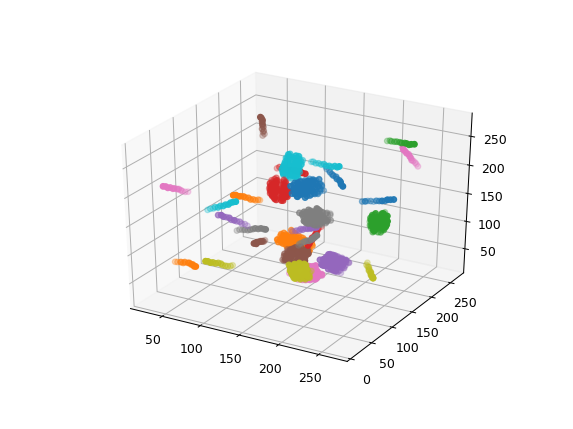

In [65]:
plot_peptide_list(c_1)

In [63]:
%matplotlib notebook